In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

In [8]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [9]:
#Convert X feature to a matri

y=np.array(auto['mpg'])
x=np.array(auto['horsepower']).reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [11]:
#Fit a Linear regression Model
from sklearn.metrics import mean_squared_error, r2_score

polynomial_features= PolynomialFeatures(degree=4,include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

polymodel = LinearRegression()
polymodel.fit(X_poly_train, y_train)
y_poly_pred_train = polymodel.predict(X_poly_train)
y_poly_pred = polymodel.predict(X_poly_test)

mse_train = mean_squared_error(y_train, y_poly_pred_train)
mse = mean_squared_error(y_test,y_poly_pred)

r2_train = r2_score(y_train, y_poly_pred_train)
r2 = r2_score(y_test,y_poly_pred)
print(mse_train, mse)
print(r2_train, r2)

16.96613906140968 26.932769727503764
0.722729183842642 0.5415586866013535


    Degree  Train R2 Score  Test R2 Score
0        1        0.639411       0.460038
1        2        0.719710       0.551387
2        3        0.722526       0.538843
3        4        0.722729       0.541559
4        5        0.725036       0.564743
5        6        0.727218       0.566440
6        7        0.725598       0.559074
7        8        0.724744       0.553093
8        9        0.725621       0.554004
9       10        0.726653       0.558179
10      12        0.659192       0.410518


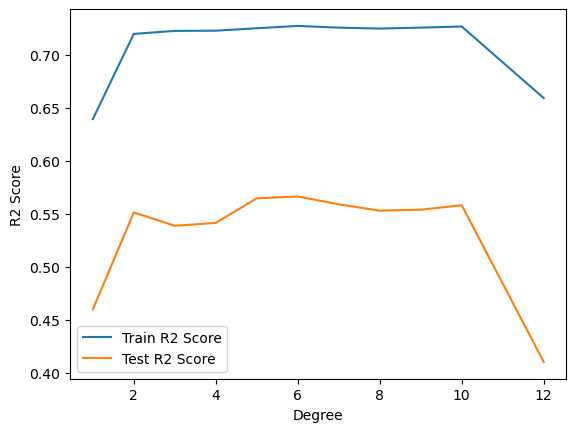

In [17]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,12]  # Denenecek dereceler

train_r2_scores = []
test_r2_scores = []

results = {'Degree': [], 'Train R2 Score': [], 'Test R2 Score': []}

for degree in degrees:
    polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    train_r2 = r2_score(y_train, model.predict(X_poly_train))
    test_r2 = r2_score(y_test, model.predict(X_poly_test))
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    results['Degree'].append(degree)
    results['Train R2 Score'].append(train_r2)
    results['Test R2 Score'].append(test_r2)

# Sonuçları DataFrame olarak oluşturun
results_df = pd.DataFrame(results)

print(results_df)

# Grafiği çizdirin
import matplotlib.pyplot as plt

plt.plot(degrees, train_r2_scores, label='Train R2 Score')
plt.plot(degrees, test_r2_scores, label='Test R2 Score')
plt.xlabel('Degree')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

R^2 score: 0.5664400042768722
r2 score: 0.5664400042768722


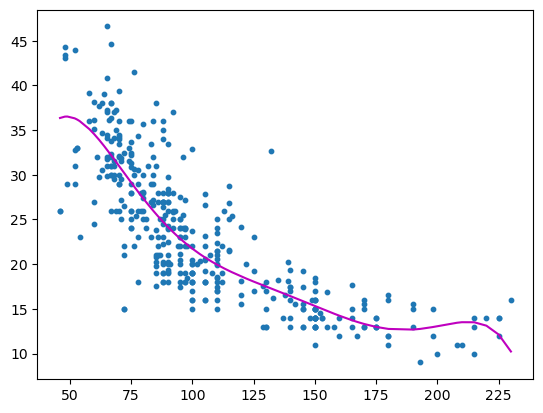

In [32]:
# 6. degree gives the best result, for 6. degree R^2 is 0.566440. It is not good, but for polynomial regression It is the best.

polynomial_features = PolynomialFeatures(degree=6, include_bias=False)

X_poly = polynomial_features.fit_transform(x)

# Fit and transform polynomial features on training data
X_poly_train = polynomial_features.fit_transform(X_train)

# Fit linear regression model on polynomial features
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Transform test data using the same polynomial features
X_poly_test = polynomial_features.transform(X_test)

# Predict on the transformed test data
y_poly_test = model.predict(X_poly_test)

# Calculate R^2 score
r2score = r2_score(y_test, y_poly_test)
print("R^2 score:", r2score)

print("r2 score:", r2score)

y_poly_pred = model.predict(X_poly)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()